In [264]:
import os
#For the sake of cleanliness, ignore warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

In [265]:
os.listdir()

['.ipynb_checkpoints',
 'closed_issue_comments.csv',
 'closed_merged_prs.csv',
 'data-vis-sample.ipynb',
 'issue_assignees.csv',
 'issue_contrib.csv',
 'open_closed_merged_prs.csv',
 'positive_negative_pr_contributions.csv',
 'repo_maintenance.csv',
 'sentiment_analysis.csv']

In [267]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

pd.set_option('max_columns', 50)
#Inline imaging
%matplotlib inline

In [268]:
df = pd.read_csv('positive_negative_pr_contributions.csv', delimiter='|')
df.head()

,net_negative,net_equal,deletions,additions,number,net_positive
0,0,0,1,1,3391,0
1,0,0,2,3,3390,1
2,0,0,1,3,3388,2
3,0,0,0,36,3387,36
4,0,0,1,1,3386,0


In [269]:
#Define the index. inplace=True maintains the same DataFrame object rather than creating a new one
df.set_index('number', inplace=True)
df.head()
#print(users[(users.age == 40) & (users.sex == 'M')].head(3))\
#print(num_pos)

,net_negative,net_equal,deletions,additions,net_positive
number,,,,,
3391,0,0,1,1,0
3390,0,0,2,3,1
3388,0,0,1,3,2
3387,0,0,0,36,36
3386,0,0,1,1,0


In [270]:
#Take a single column assign to new dataframe object.
new_df = df[['net_positive']]
#Observe that the DF's value is greater than 50
print(new_df[(new_df.net_positive > 50)])
#Create a list comprehension
nums = [i for i in new_df['net_positive'] if i > 50]

        net_positive
number              
3268             172
3244              72
3227              62
3210             109
3135              60
3112             128
3109             113
3035             406
3017              75
2924             129
2907              80
2839              66
2783             238
2774             535


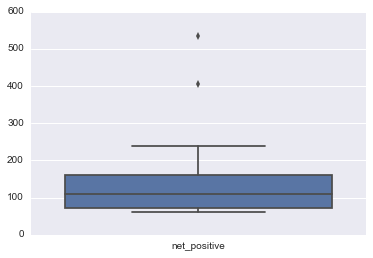

In [341]:
x_1 = new_df[(new_df.net_positive > 50)]
ax1= sns.boxplot(data=x_1, orient="v", notch=False)
#Set the xlim to whatever the maximum plus 10 ticks to show any outliers in the set
#This data represents when PRs have net positive to the codebase greater than 100 lines of code
#ax.set(xlim=(0, max(nums) + 10))


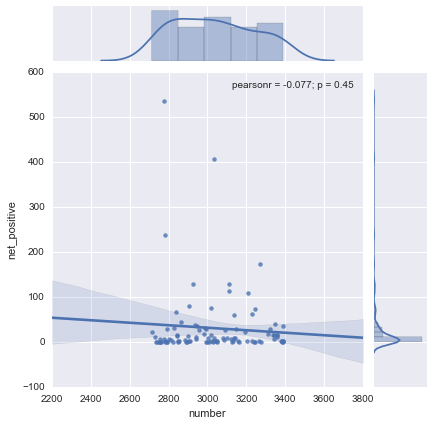

In [289]:
#Jointplot with a linear regression (Defined )
g = sns.jointplot(x=df.index, y=(new_df['net_positive']), kind="reg")

In [293]:
#hexplot

df1 = pd.read_csv('issue_assignees.csv', delimiter="|")
df1.set_index('assigned_name', inplace=True)

<bound method JointGrid.plot of <seaborn.axisgrid.JointGrid object at 0x1230650b8>>

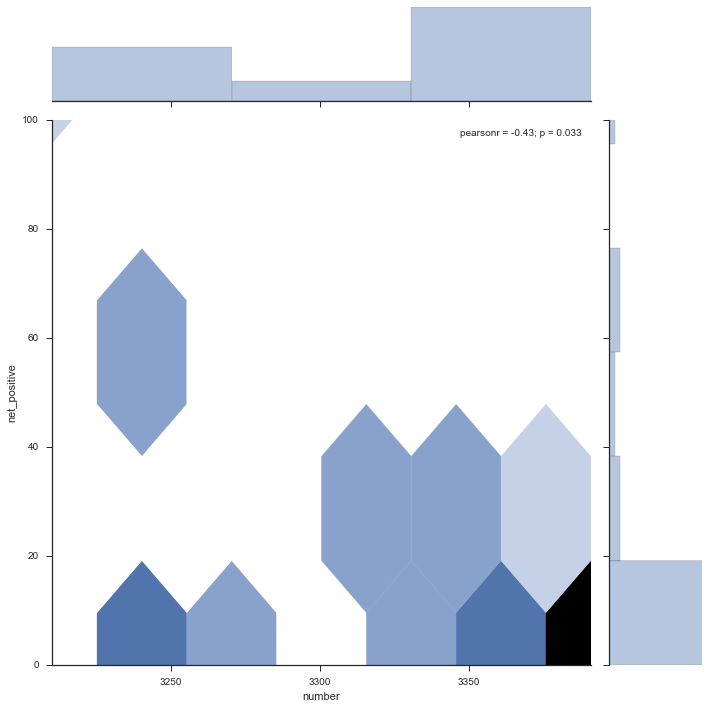

In [363]:
ax2 = sns.jointplot(x=new_df.index[:25], y=new_df.net_positive[:25], kind="hex",  ylim=(0,100), size=10)
ax2.plot